### 进一步的工作 20260211
之前使用yolo比较容易的识别出人体关键点，不管是命令行，还是python代码，接口都简单，几行代码就实现了功能。由于我只想先关注下肢的发力，或者持球手一侧的肢体变化，就想把多余的关键点剔除掉，预想这个目标要跳过已有接口，要从解析result这个结构入手，利用结构已有的小接口来组装这个功能。
yolo的参考资料比较友好，简洁而周到，链接如下：
https://docs.ultralytics.com/reference/engine/results/  
看到关键点keypoints的描述，我就想，能否直接修改conf置信度参数，把不需要的关键点的置信度设置为0，其他保存不变，这样也许是比较简单的办法。

# 设置指定关键点置信度为0，屏蔽部分关键点

python代码如下，在jupyter notebook下直接运行，需要修改文件名

```
from ultralytics import YOLO

# Load a model
model = YOLO("yolo26n-pose.pt")  # pretrained YOLO26n model
results = model.predict("mypose640.jpg", save=False)
for result in results:
    kp_data = result.keypoints.data.clone()
    kp_data[:, [0,1,2,3,4,5,7,9,11,13,15], 2] = 0.0
    result.update(keypoints = kp_data)
    result.show(boxes = False, line_width = 5.0,labels = False, kpt_radius = 3)
```

因为result的keypoints关键点的置信度是只读的，不能直接修改，于是想到了读修改写的方式。先克隆原始数据，把数据中的鼻子，眼睛，耳朵，左半关键点的置信度设置为0，通过update接口刷新，调用show接口的时候，把不想显示的boxes设置为False。
### 关键一行代码是豆包写的，也是它解释的
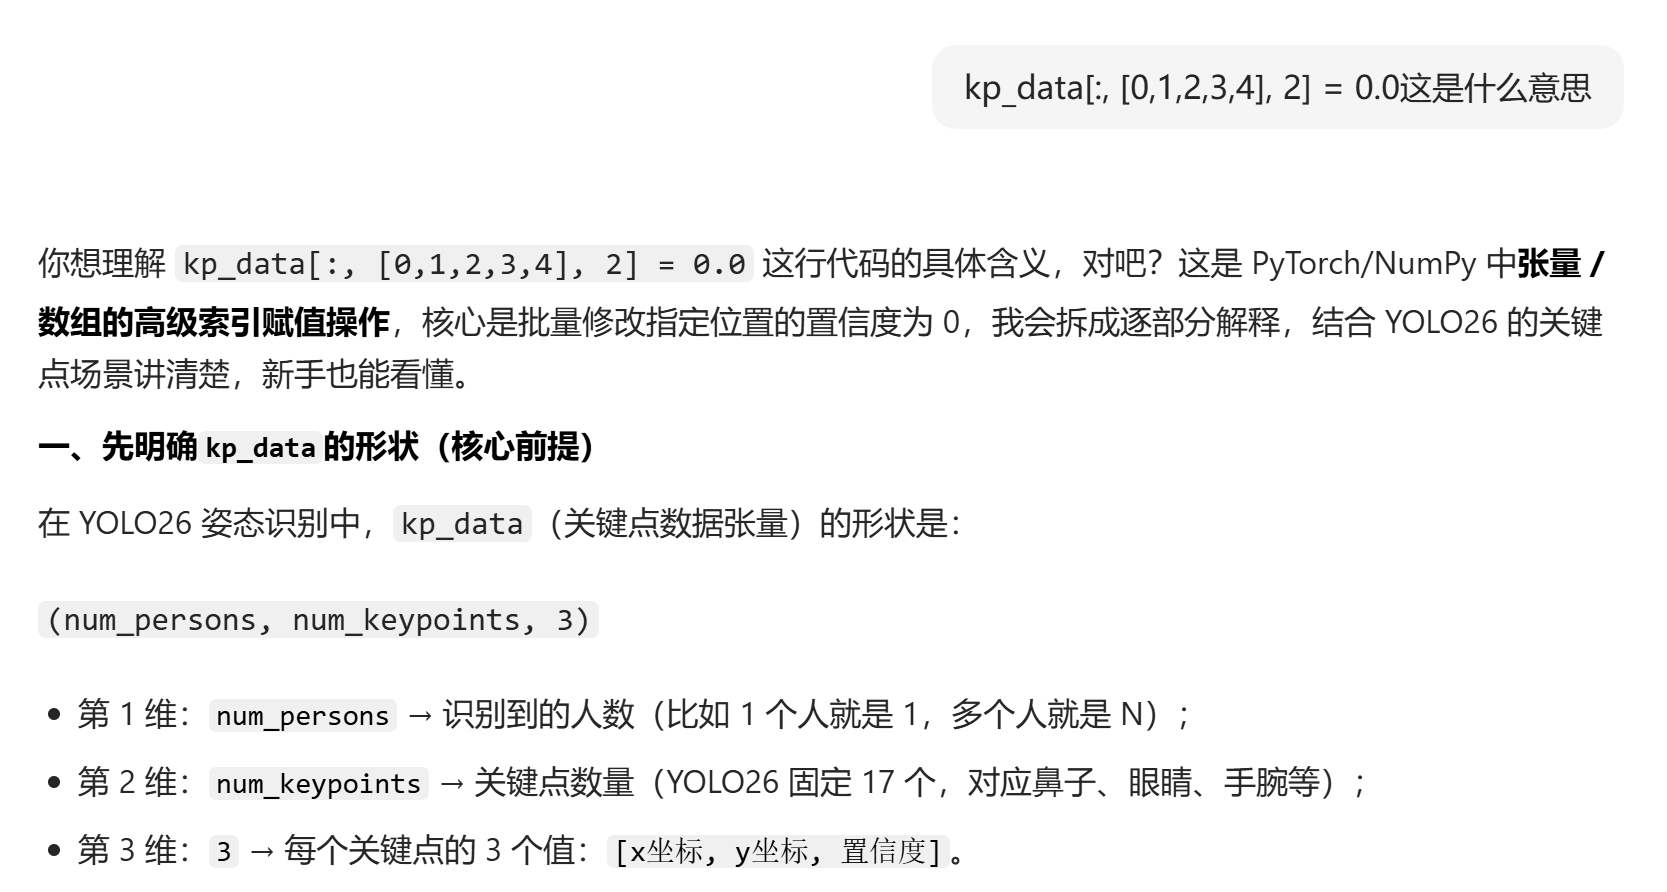

### 最初的提问和回答：
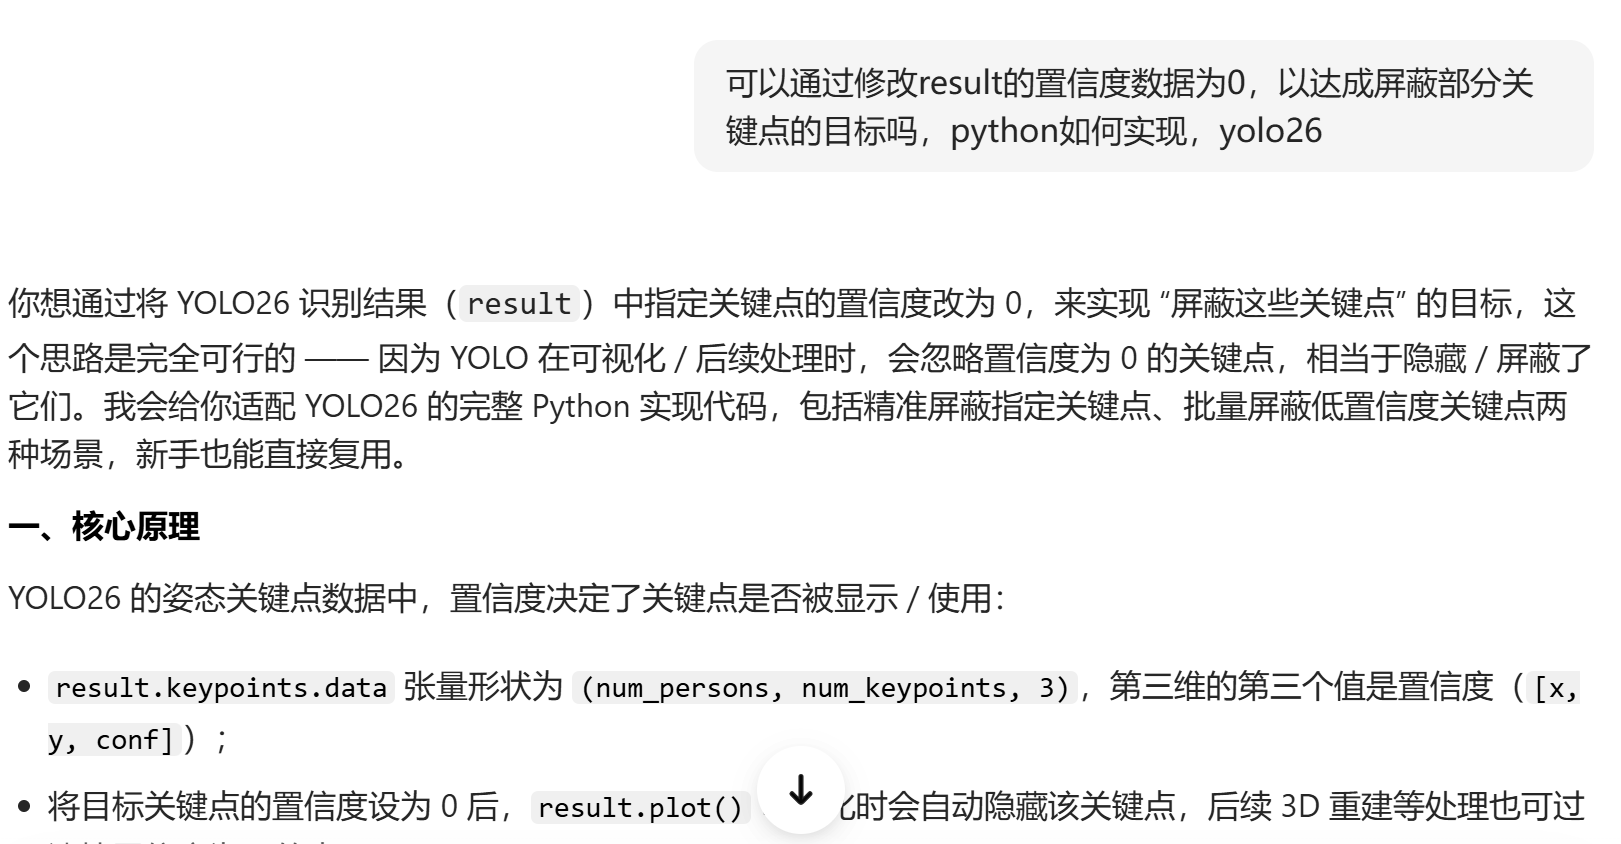

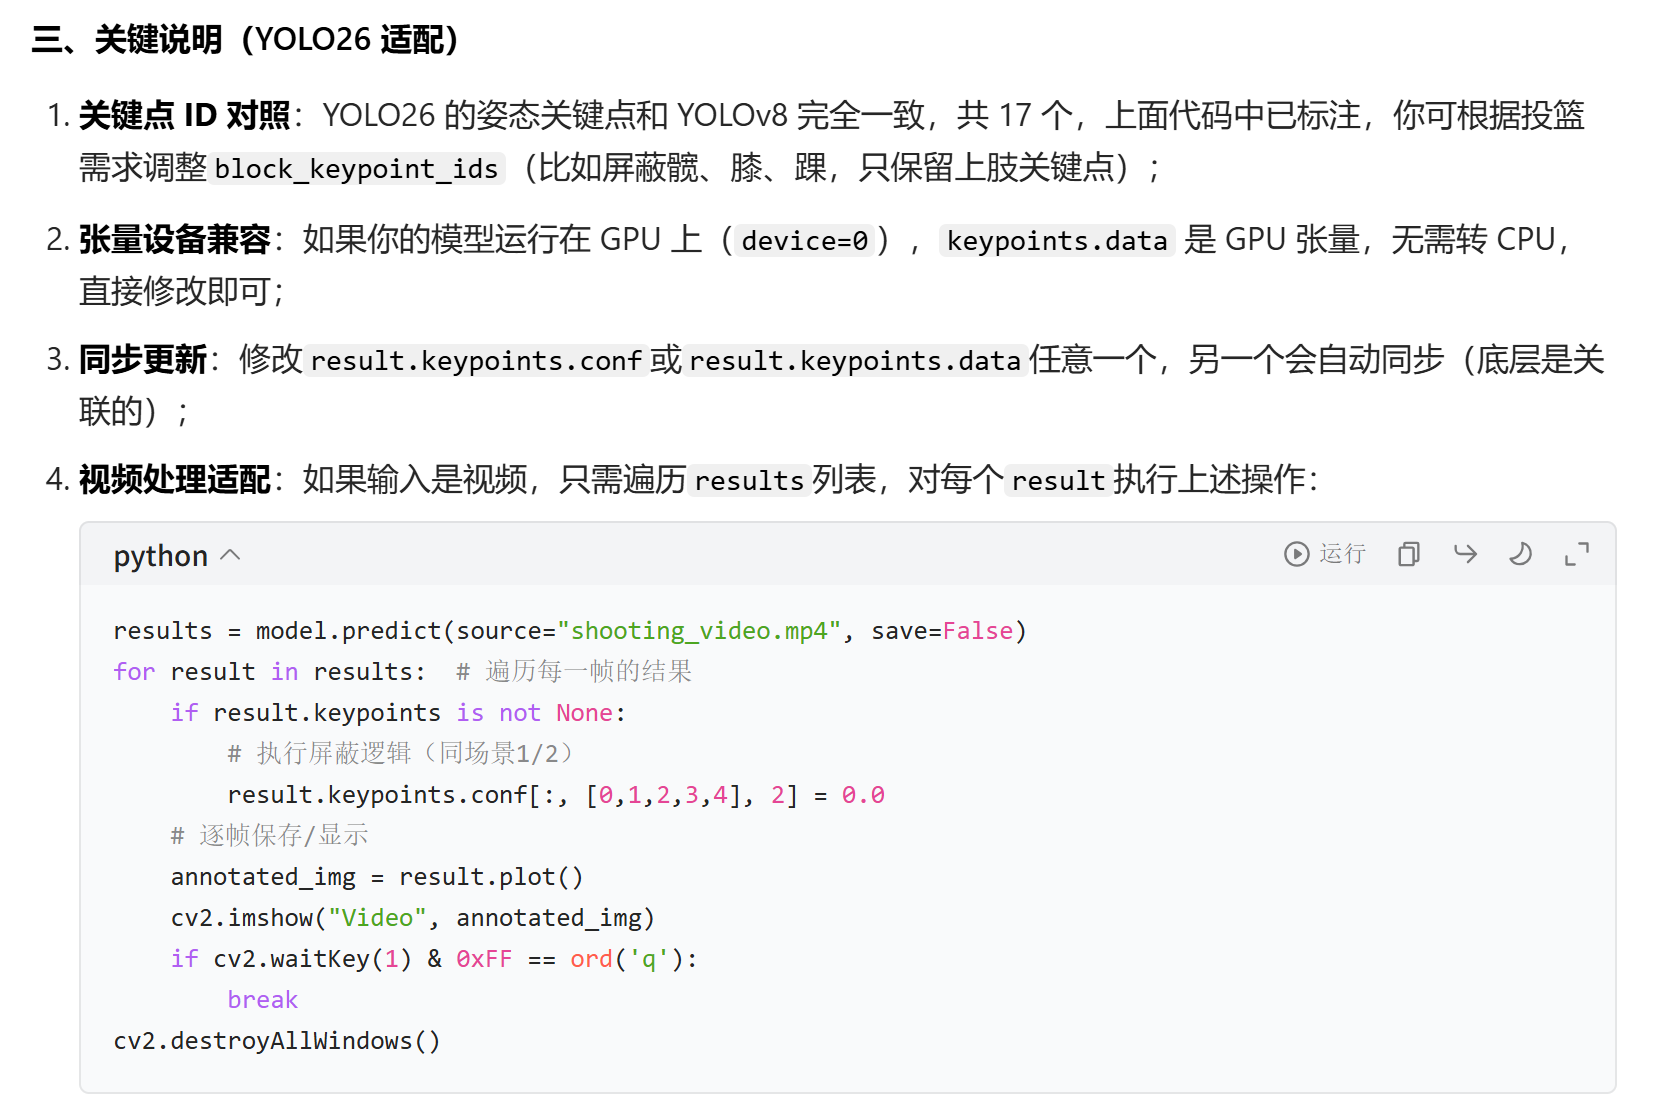

### 关键点描述
来自以下链接：https://docs.ultralytics.com/zh/tasks/pose/

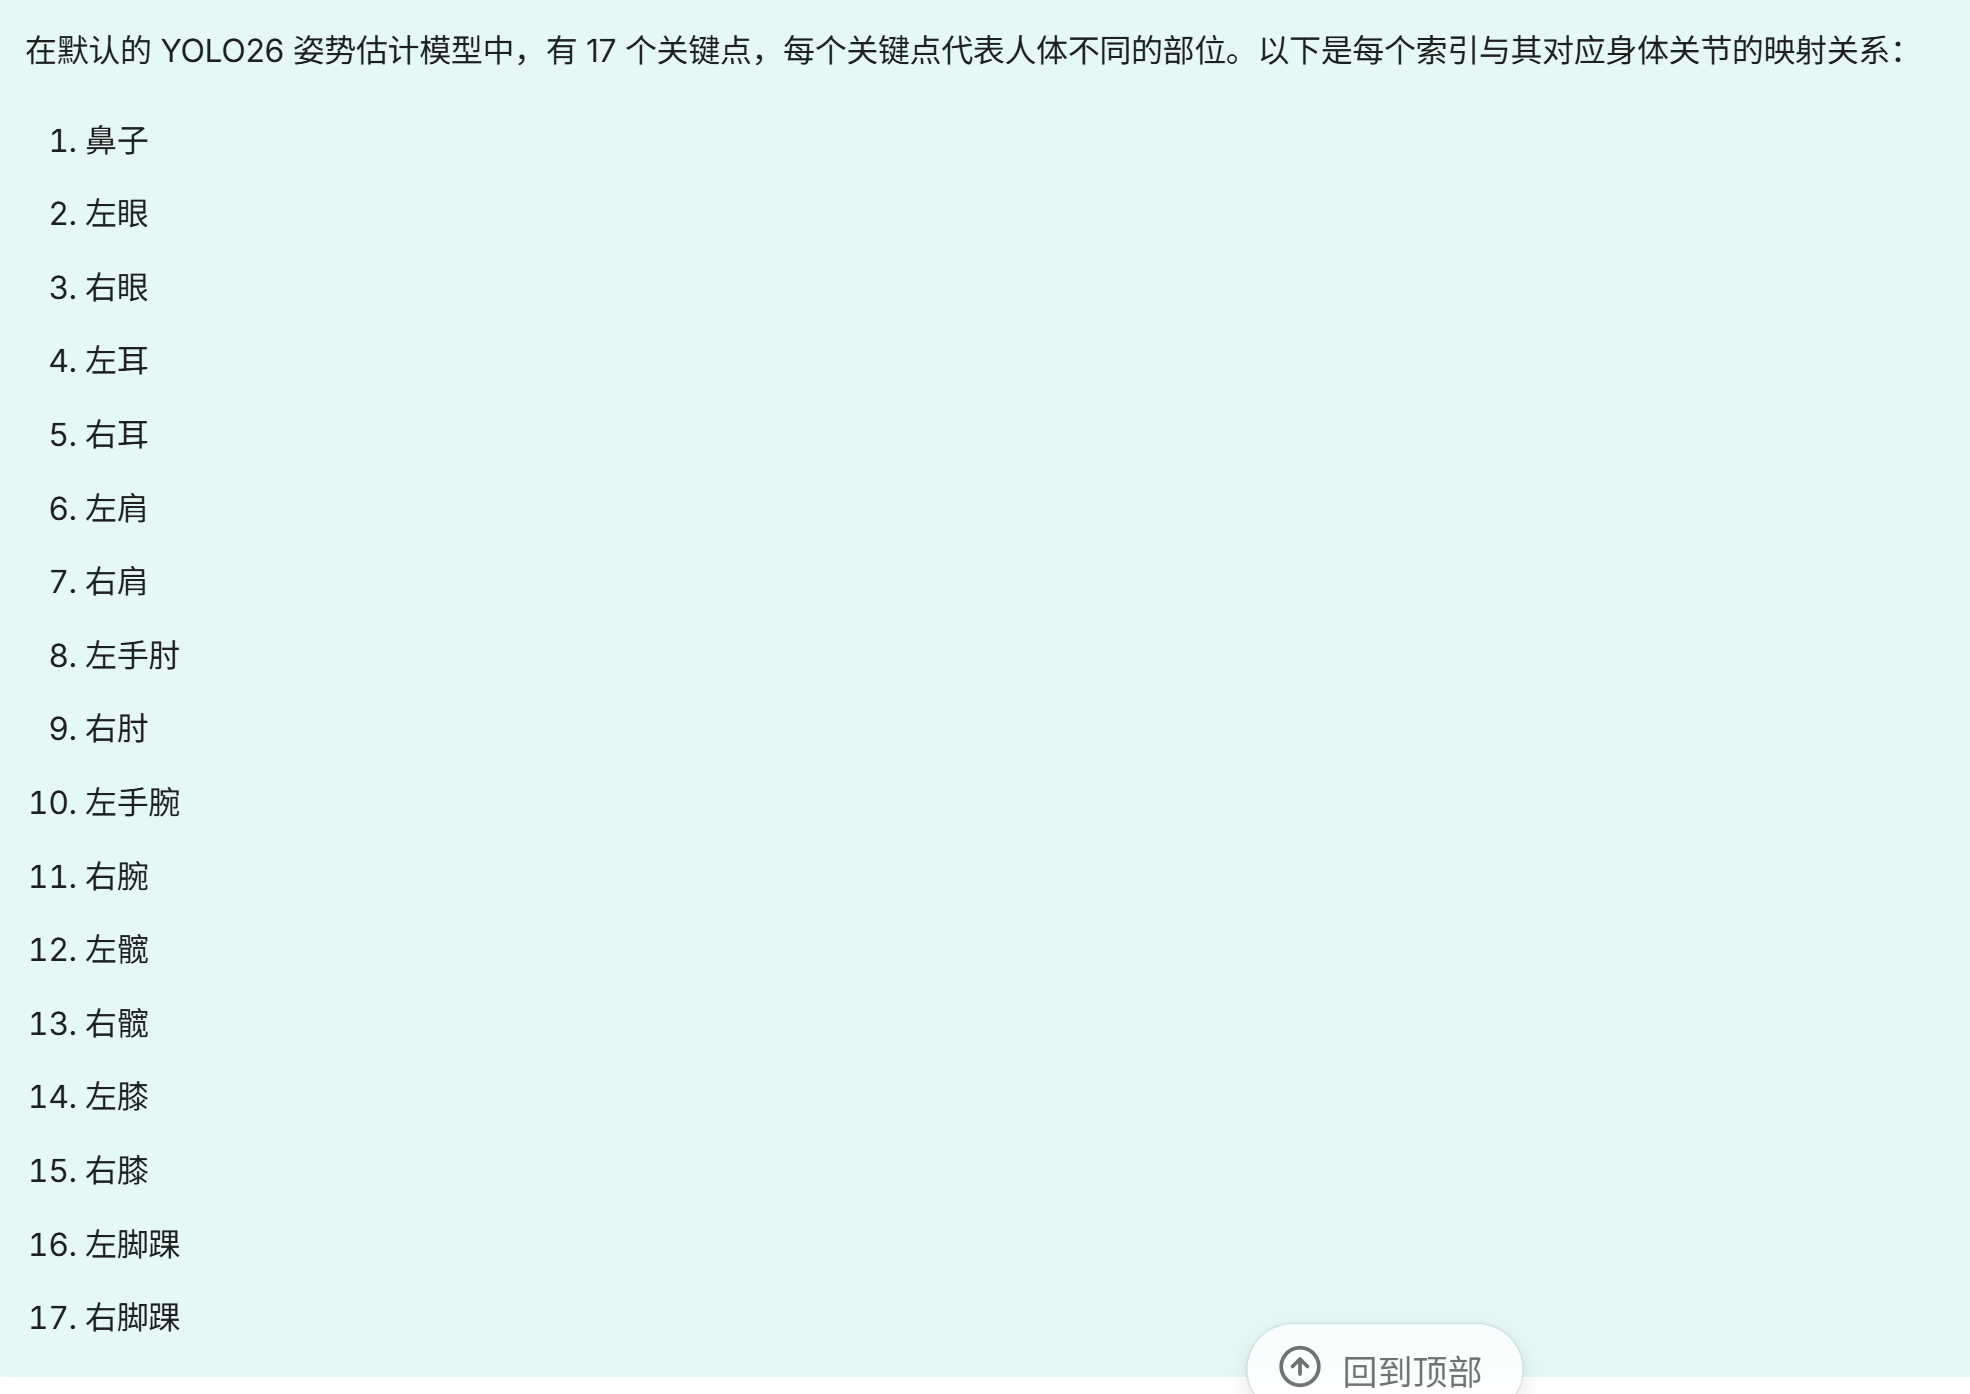



# 结果 
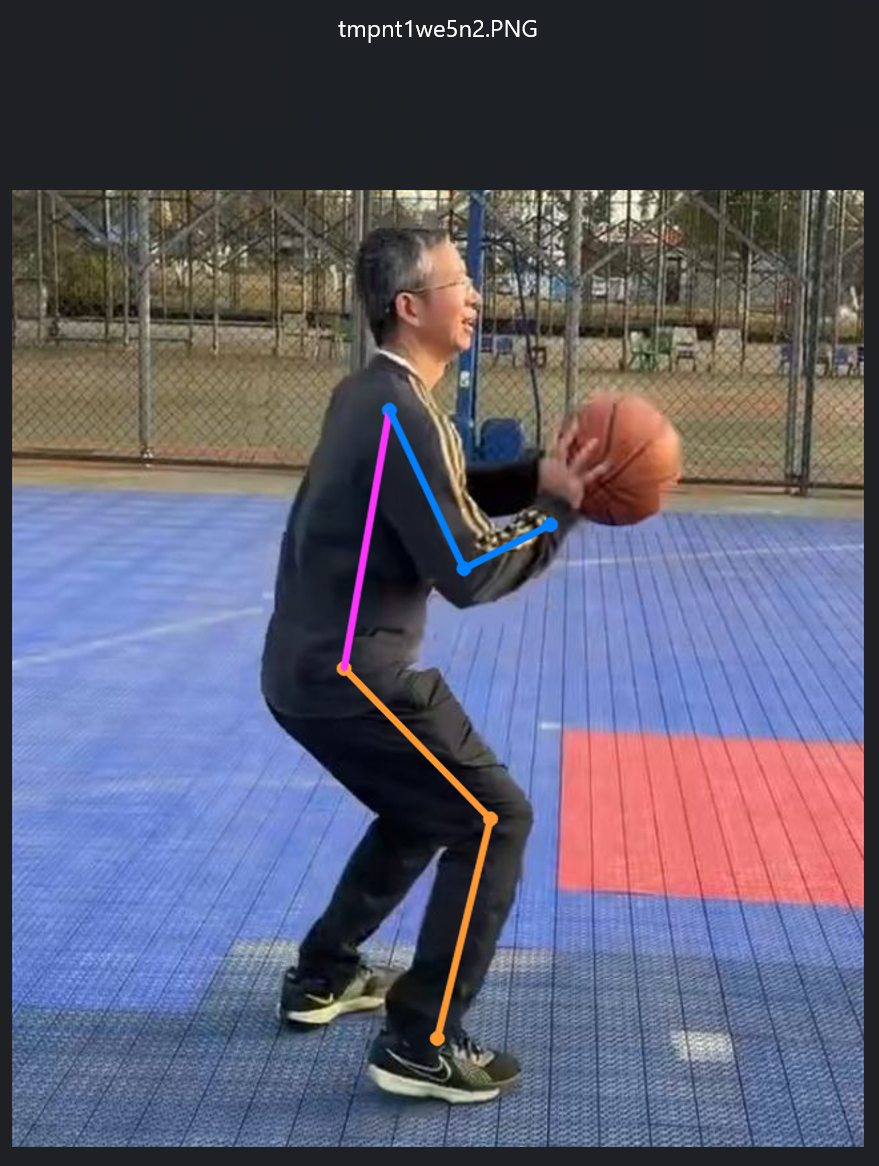
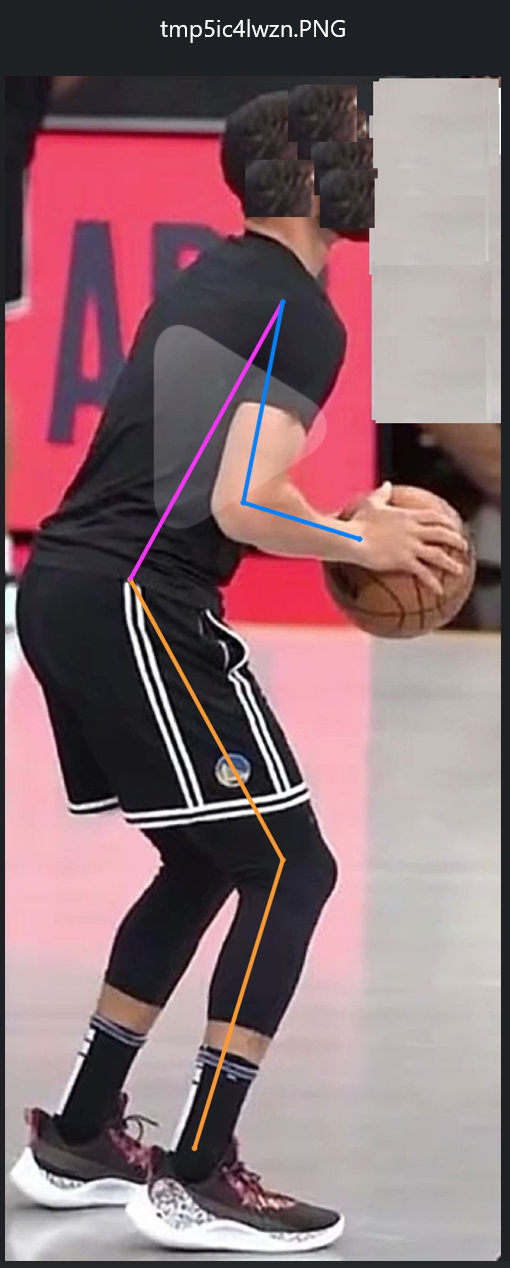

# 总结
在豆包的帮助下，通过简约的代码实现了关键点裁剪功能，程序员和AI工具的配合确实可以提升效率，AI在加速，希望更牛的自动编程工具，后续有机会需要尝一下GitHub Copilot。回想二十多年前，程序上的问题要去找同事，总是费尽周折，遇到非常疑难的问题，要找个牛人帮助，必须先写个工作联络单，请领导出面。未来程序员的价值更加降低，系统工程师指挥AI就能干出大事。
